In [25]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd 
import datetime

In [26]:
NdCell1AMmass = 0.01544
NdCell2AMmass = 0.00928

#Part 1 
df = pd.read_csv(r'/Users/Michael/Desktop/GitHub/ChemPhysicsMisc/ChemPhysicsMisc/PhDWork/Data/cell1-insitu-Nb-edge-Nd-TNO_C01.txt', delimiter = "\t", header = 0, encoding= 'unicode_escape')
df.columns = ["Time (s)", "Voltage (V)", "Current (A)"]
df = df.fillna(0)
df['Time'] = pd.to_timedelta(df['Time (s)'], unit="s")
df['TOD'] = pd.Timedelta("0 days,  9 hours 9 min")
df['TOD2'] = df['TOD'] + df['Time']
df['Capacity'] = abs(df['Time (s)'] * df['Current (A)'])/ (3600 * NdCell1AMmass) 
dfSimplified = df[['TOD2', 'Capacity']].copy()
dfSimplified.head()

#Part10
df10 = pd.read_csv(r'/Users/Michael/Desktop/GitHub/ChemPhysicsMisc/ChemPhysicsMisc/PhDWork/Data/cell1-insitu-Nb-edge-Nd-TNO-part10_C01.txt', delimiter = "\t", header = 0, encoding= 'unicode_escape')
df10.columns = ["Time (s)", "Voltage (V)", "Current (A)"]
df10 = df10.fillna(0)
df10['Time'] = pd.to_timedelta(df10['Time (s)'], unit="s")
df10['TOD'] = pd.Timedelta("0 days,  19 hours 28 min")
df10['TOD2'] = df10['TOD'] + df10['Time']
df10['Capacity'] = abs(df10['Time (s)'] * df10['Current (A)'])/ (3600 * NdCell2AMmass) 
df10['Capacity'] += 31
dfSimplified10 = df10[["Voltage (V)", 'TOD2', 'Capacity']].copy()
dfSimplified10.head()

#Part10
df11 = pd.read_csv(r'/Users/Michael/Desktop/GitHub/ChemPhysicsMisc/ChemPhysicsMisc/PhDWork/Data/cell1-insitu-Nb-edge-Nd-TNO-part11_C01.txt', delimiter = "\t", header = 0, encoding= 'unicode_escape')
df11.columns = ["Time (s)", "Voltage (V)", "Current (A)"]
df11 = df11.fillna(0)
df11['Time'] = pd.to_timedelta(df11['Time (s)'], unit="s")
df11['TOD'] = pd.Timedelta("1 days,  5 hours 10 min")
df11['TOD2'] = df11['TOD'] + df11['Time']
df11['Capacity'] = abs(df11['Time (s)'] * df11['Current (A)'])/ (3600 * NdCell2AMmass) 
df11['Capacity'] += 172
dfSimplified11 = df11[["Voltage (V)", 'TOD2', 'Capacity']].copy()


frames = [dfSimplified10, dfSimplified11]
dfNd = pd.concat(frames)


(0.0, 3.0)

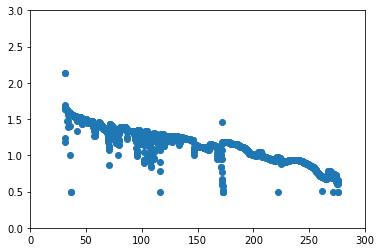

In [27]:
x = dfNd['Capacity']
y = dfNd['Voltage (V)']
plt.scatter(x, y)

plt.xlim(0, 300)
plt.ylim(0,3)

In [76]:
A = -0.231 #mA

dfSmooth10 = df10
dfSmooth10 = dfSmooth10[dfSmooth10['Current (A)'] == A]
dfSmooth11 = df11
dfSmooth11 = dfSmooth11[dfSmooth11['Current (A)'] == A]

framesSmooth = [dfSmooth10, dfSmooth11]
dfSmooth = pd.concat(framesSmooth)


(0.0, 3.0)

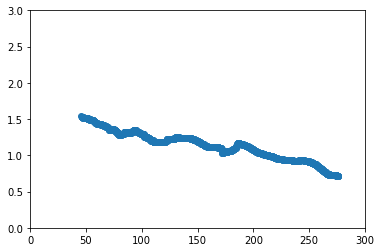

In [84]:
window_size = 100  # Adjust smoothing parameters
dfSmooth['SmoothVoltage'] = dfSmooth['Voltage (V)'].rolling(window=window_size).mean()

x = dfSmooth['Capacity']
y = dfSmooth['SmoothVoltage']
plt.scatter(x, y)

plt.xlim(0, 300)
plt.ylim(0,3)